# [kaggle link](https://www.kaggle.com/code/jhoward/multi-target-road-to-the-top-part-4)

In [2]:
dependencies = [
    "kagtool",
    "kaggle",
    "fastai",
    "nbdev",
    "datasets",
    "timm"
]

!pip install -U {" ".join(dependencies)}

from fastai.imports import *

In [3]:
import torch
import gc

def report_gpu():
    print(torch.cuda.list_gpu_processes())
    gc.collect()
    torch.cuda.empty_cache()

In [1]:
from kagtool.datasets.kaggle_downloader import KaggleDownloader

dataset_name = 'paddy-disease-classification'
# add your kaggle username and key here
creds = '{"username":"","key":""}'

path = KaggleDownloader(dataset_name, creds).load_or_fetch_kaggle_dataset()
from fastai.vision.all import *
from fastcore.parallel import *

trn_path = path/'train_images'

/Users/cactus/miniconda3/lib/python3.12/site-packages/kaggle/api/kaggle_api.py:1055: SyntaxWarning: invalid escape sequence '\&'
  """Creates (aka \&quot;drops\&quot;) a new file into the inbox.  # noqa: E501
/Users/cactus/miniconda3/lib/python3.12/site-packages/kaggle/api/kaggle_api.py:1076: SyntaxWarning: invalid escape sequence '\&'
  """Creates (aka \&quot;drops\&quot;) a new file into the inbox.  # noqa: E501
/Users/cactus/miniconda3/lib/python3.12/site-packages/kaggle/api_client.py:244: SyntaxWarning: invalid escape sequence '\['
  sub_kls = re.match('list\[(.*)\]', klass).group(1)
/Users/cactus/miniconda3/lib/python3.12/site-packages/kaggle/api_client.py:249: SyntaxWarning: invalid escape sequence '\('
  sub_kls = re.match('dict\(([^,]*), (.*)\)', klass).group(2)


ApiException: (403)
Reason: Forbidden
HTTP response headers: HTTPHeaderDict({'Content-Type': 'application/json', 'Date': 'Wed, 26 Jun 2024 20:00:23 GMT', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Origin': '*', 'Set-Cookie': 'ka_sessionid=3d28c70f9a079408e7dbff14f16df6bd; max-age=2626560; path=/, .AspNetCore.Mvc.CookieTempDataProvider=CfDJ8GYiNaMVVSVCnegdIdgHCPNXD6yULxFlh_0SlrcaeQqo6rND1NPH3V_X3SBNuC2dfuHpayvnMu0R14M0Tz0JkJfftzmEOSEJHFwGqKDNUK_kfahTEHaDpfPWEh5IcFuYYpgyh_Fyon_GDi6j6Hk_4ppWTMRnmQOz16GKYpYs5A1EL36KLmUrNv2RHXEwwMPLt3Jxl4FMvTHgnHwBHUnptMIRVmMzh9cRhfawmuNd0PsPgN84-w_-E6kDBt3ler1JRBsJ89tpAJCq_w; path=/; samesite=lax; httponly, GCLB=CPidwu6wjoH81AEQAw; path=/; HttpOnly', 'Transfer-Encoding': 'chunked', 'Vary': 'Accept-Encoding', 'X-Kaggle-MillisecondsElapsed': '201', 'X-Kaggle-RequestId': '4249bf8b1ceeeb8e32ae5e9ca1483ee6', 'X-Kaggle-ApiVersion': '1.6.14', 'X-Kaggle-HubVersion': '0.2.6', 'X-Frame-Options': 'SAMEORIGIN', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains; preload', 'Content-Security-Policy': "object-src 'none'; script-src 'nonce-d+O5uKe9u7vGOfEsMrMJGw==' 'report-sample' 'unsafe-inline' 'unsafe-eval' 'strict-dynamic' https: http:; base-uri 'none'; report-uri https://csp.withgoogle.com/csp/kaggle/20201130; frame-src 'self' https://www.kaggleusercontent.com https://www.youtube.com/embed/ https://polygraph-cool.github.io https://www.google.com/recaptcha/ https://www.docdroid.com https://www.docdroid.net https://kaggle-static.storage.googleapis.com https://kkb-production.jupyter-proxy.kaggle.net https://kkb-production.firebaseapp.com https://kaggle-metastore.firebaseapp.com https://apis.google.com https://content-sheets.googleapis.com/ https://accounts.google.com/ https://storage.googleapis.com https://docs.google.com https://drive.google.com https://calendar.google.com/ ;", 'X-Content-Type-Options': 'nosniff', 'Referrer-Policy': 'strict-origin-when-cross-origin', 'Via': '1.1 google', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'})
HTTP response body: b'{"code":403,"message":"You must accept this competition\\u0027s rules before you\\u0027ll be able to download files."}'


In [5]:
df = pd.read_csv(path/'train.csv', index_col='image_id')
df.head()

,label,variety,age
image_id,,,
100330.jpg,bacterial_leaf_blight,ADT45,45
100365.jpg,bacterial_leaf_blight,ADT45,45
100382.jpg,bacterial_leaf_blight,ADT45,45
100632.jpg,bacterial_leaf_blight,ADT45,45
101918.jpg,bacterial_leaf_blight,ADT45,45


In [6]:
df.loc['100330.jpg', 'variety']

'ADT45'

In [7]:
def get_variety(p): return df.loc[p.name, 'variety']

In [8]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock,CategoryBlock),
    n_inp=1,
    get_items=get_image_files,
    get_y = [parent_label,get_variety],
    splitter=RandomSplitter(0.2, seed=42),
    item_tfms=Resize(192, method='squish'),
    batch_tfms=aug_transforms(size=128, min_scale=0.75),
).dataloaders(trn_path)

Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


NotImplementedError: The operator 'aten::_linalg_solve_ex.result' is not currently implemented for the MPS device. If you want this op to be added in priority during the prototype phase of this feature, please comment on https://github.com/pytorch/pytorch/issues/77764. As a temporary fix, you can set the environment variable `PYTORCH_ENABLE_MPS_FALLBACK=1` to use the CPU as a fallback for this op. WARNING: this will be slower than running natively on MPS.

In [ ]:
dls.vocab

(#2) [['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro'],['ADT45', 'AndraPonni', 'AtchayaPonni', 'IR20', 'KarnatakaPonni', 'Onthanel', 'Ponni', 'RR', 'Surya', 'Zonal']]

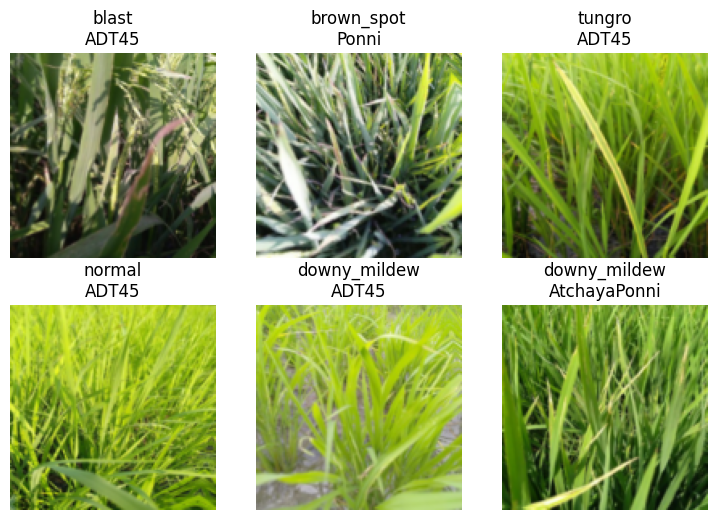

In [ ]:
dls.show_batch(max_n=6)

In [ ]:
def disease_loss(inp,disease,variety): return F.cross_entropy(inp[:,:10],disease)
def variety_loss(inp,disease,variety): return F.cross_entropy(inp[:,10:],variety)
def combine_loss(inp,disease,variety): return disease_loss(inp,disease,variety)+variety_loss(inp,disease,variety)

def disease_err(inp,disease,variety): return error_rate(inp[:,:10],disease)
def variety_err(inp,disease,variety): return error_rate(inp[:,10:],variety)
err_metrics = (disease_err,variety_err)

all_metrics = err_metrics+(disease_loss,variety_loss)

In [ ]:
arch = 'convnext_small_in22k'
lr = 0.01

In [ ]:
learn = vision_learner(dls, arch, loss_func=combine_loss, metrics=all_metrics, n_out=20).to_fp16()

/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name convnext_small_in22k to current convnext_small.fb_in22k.
  model = create_fn(


In [ ]:
learn.fine_tune(5, lr)

epoch,train_loss,valid_loss,disease_err,variety_err,disease_loss,variety_loss,time
0,2.263034,1.292136,0.273426,0.124940,0.889606,0.402531,00:20


epoch,train_loss,valid_loss,disease_err,variety_err,disease_loss,variety_loss,time
0,1.007020,0.680510,0.138395,0.076886,0.430182,0.250329,00:26
1,0.771544,0.531907,0.117732,0.062951,0.347686,0.184221,00:25
2,0.481902,0.299183,0.079289,0.021624,0.236505,0.062678,00:25
3,0.287030,0.194249,0.057184,0.012013,0.155089,0.039160,00:26
4,0.212432,0.182509,0.048534,0.012013,0.146184,0.036325,00:25


In [ ]:
tst_files = get_image_files(path/'test_images').sorted()
tst_dl = learn.dls.test_dl(tst_files)

preds = learn.tta(dl=tst_dl)[0]

In [ ]:
preds.shape

torch.Size([3469, 20])

In [ ]:
preds[0]

tensor([ 1.3867, -7.3503, -3.5638, -3.5457,  1.4720, -1.3193, -0.3056,  9.2505,
        -1.5215, -4.3765, 12.9111,  1.4762, -2.1129, -7.3618, -2.5987, -4.8506,
        -3.2764, -6.1191, -5.6611, -8.2373])

In [ ]:
idxs = preds.argmax(dim=1)
idxs

tensor([10,  8,  3,  ...,  8, 14,  5])

In [ ]:
dls.vocab[0]

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']

In [ ]:
len(preds[0])

20

In [ ]:
vocab = np.array(dls.vocab)
disease = vocab[0]
idxs_disease = preds[:,:len(disease)].argmax(dim=1)
results_disease = pd.Series(disease[idxs_disease], name="idxs_disease")

ss = pd.read_csv(path/'sample_submission.csv')
ss['label'] = pd.Series(disease[idxs_disease], name="idxs_disease")
ss.to_csv('subm.csv', index=False)
!head subm.csv

image_id,label
200001.jpg,hispa
200002.jpg,normal
200003.jpg,blast
200004.jpg,blast
200005.jpg,blast
200006.jpg,brown_spot
200007.jpg,dead_heart
200008.jpg,brown_spot
200009.jpg,hispa
